# 기본 텐서 조작

## 텐서 만들기

In [ ]:
import tensorflow as tf
import numpy as np
np.set_printoptions(precision=3)

In [ ]:
a = np.array([1,2,3], dtype=np.int32)
b = [4,5,6]

In [ ]:
t_a = tf.convert_to_tensor(a)
t_b = tf.convert_to_tensor(b)

In [ ]:
print(t_a)
print(t_b)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([4 5 6], shape=(3,), dtype=int32)


In [ ]:
t_ones = tf.ones((2, 3))
t_ones.shape

TensorShape([2, 3])

In [ ]:
t_ones.numpy()

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [ ]:
# 상수 값을 가진 텐서
const_tensor = tf.constant([1.2, 5, np.pi], dtype=tf.float32)
print(const_tensor)

tf.Tensor([1.2   5.    3.142], shape=(3,), dtype=float32)


In [ ]:
# 원하는 스칼라 값으로 채워진 텐서
tf.fill((2, 3), 2)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[2, 2, 2],
       [2, 2, 2]], dtype=int32)>

In [ ]:
# 원-핫 인코딩 행렬
tf.one_hot([0, 1, 2], 4)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)>

## 텐서 데이터 타입과 크기 조작

### tf.cast() : 텐서의 데이터 타입 변경

In [ ]:
t_a_new = tf.cast(t_a, tf.int64)
print(t_a_new.dtype)

<dtype: 'int64'>


### 텐서 크기 조작
### tf.transpose() : 텐서 전치 
### tf.reshape() : 텐서 크기 변경
### tf.squeeze() : 불필요한 차원 삭제, 크기가 1인 차원 불필요

In [ ]:
t = tf.random.uniform(shape=(3, 5))
t_tr = tf.transpose(t)
print(t.shape, '->', t_tr.shape)

(3, 5) -> (5, 3)


In [ ]:
t = tf.zeros((30,))
t_reshape = tf.reshape(t, shape=(5, 6))
print(t_reshape.shape)

(5, 6)


In [ ]:
t = tf.zeros((1, 2, 1, 4, 1))
t_sqz = tf.squeeze(t, axis=(2, 4))
print(t.shape, '->', t_sqz.shape)

(1, 2, 1, 4, 1) -> (1, 2, 4)


## 텐서에 수학 연산 적용

In [ ]:
tf.random.set_seed(1)

In [ ]:
# 균등분포
t1 = tf.random.uniform(shape=(5, 2),minval=-1, maxval=1)

# 표준정규분포
t2 = tf.random.normal(shape=(5, 2), mean=0, stddev=1)

In [ ]:
# 원소별 곱
t3 = tf.multiply(t1, t2).numpy()
print(t3)

[[-0.27  -0.874]
 [-0.017 -0.175]
 [-0.296 -0.139]
 [-0.727  0.135]
 [-0.401  0.004]]


In [ ]:
# 특정 축을 따라 평균, 합, 표준편차 계산
t4 = tf.math.reduce_mean(t1, axis=0)
# tf.math.reduce_sum(t1, axis=0)
# tf.math.reduce_std(t1, axis=0)
print(t4)

tf.Tensor([0.09  0.207], shape=(2,), dtype=float32)


In [ ]:
# 행렬 곱셈
t5 = tf.linalg.matmul(t1, t2, transpose_b=True)
print(t5.numpy())

[[-1.144  1.115 -0.87  -0.321  0.856]
 [ 0.248 -0.191  0.25  -0.064 -0.331]
 [-0.478  0.407 -0.436  0.022  0.527]
 [ 0.525 -0.234  0.741 -0.593 -1.194]
 [-0.099  0.26   0.125 -0.462 -0.396]]


In [ ]:
t6 = tf.linalg.matmul(t1, t2, transpose_a=True)
print(t6.numpy())

[[-1.711  0.302]
 [ 0.371 -1.049]]


In [ ]:
# 텐서의 노름 계산
# np.sqrt(np.sum(t1 * t1, axis=1))
norm_t1 = tf.norm(t1, ord=2, axis=1).numpy()
print(norm_t1)

[1.046 0.293 0.504 0.96  0.383]


## split(), stack(), concat()

### tf.split() : 하나의 텐서를 두 개 이상의 텐서로 나눔

In [ ]:
t = tf.random.uniform((6, ))
print(t.numpy())

[0.829 0.634 0.515 0.391 0.581 0.048]


#### num_or_size_splits = S : 분할 개수 지정
크기가 S인 텐서로 나눔

In [ ]:
t_splits = tf.split(t, num_or_size_splits=3)
[item.numpy() for item in t_splits]

[array([0.829, 0.634], dtype=float32),
 array([0.515, 0.391], dtype=float32),
 array([0.581, 0.048], dtype=float32)]

#### num_or_size_splits = (A, B) 다른 분할 크기 전달
크기가 A, B인 텐서 2개로 나눔

In [ ]:
t = tf.random.uniform((5, ))
print(t.numpy())

[0.236 0.239 0.504 0.774 0.611]


In [ ]:
t_splits = tf.split(t, num_or_size_splits=[3, 2])
[item.numpy() for item in t_splits]

[array([0.236, 0.239, 0.504], dtype=float32),
 array([0.774, 0.611], dtype=float32)]

### tf.concat() : 텐서를 연결

In [ ]:
A = tf.ones((3, ))
B = tf.zeros((2, ))
C = tf.concat([A, B], axis=0)
print(C.numpy())

[1. 1. 1. 0. 0.]


### tf.stack() : 크기가 같은 텐서를 쌓음

In [ ]:
A = tf.ones((3, ))
B = tf.zeros((3, ))
S1 = tf.stack([A, B], axis=0)
print(S1.numpy())

S2 = tf.stack([A, B], axis=1)
print(S2.numpy())

[[1. 1. 1.]
 [0. 0. 0.]]
[[1. 0.]
 [1. 0.]
 [1. 0.]]


# 텐서플로 데이터셋 API를 사용해 입력 파이프라인 구축

## 텐서에서 텐서플로 데이터셋 만들기


### tf.data.Dataset.from_tensor_slices() : 데이어를 데이터셋 클래스로 변환

In [ ]:
a = [1.2, 3, 4.5, 6, 7]
ds = tf.data.Dataset.from_tensor_slices(a)
print(ds)

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.float32, name=None)>


In [ ]:
for item in ds:
  print(item)

tf.Tensor(1.2, shape=(), dtype=float32)
tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(4.5, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)
tf.Tensor(7.0, shape=(), dtype=float32)


### batch(s) : 크기가 s인 배치

In [ ]:
ds_batch = ds.batch(3)
for i, elem in enumerate(ds_batch):
  print('batch {}:'.format(i), elem.numpy())

batch 0: [1.2 3.  4.5]
batch 1: [6. 7.]


## 두 개의 텐서를 하나의 데이터셋으로 연결

In [ ]:
t_x = tf.random.uniform([4, 3], dtype=tf.float32)
t_y = tf.range(4)

In [ ]:
ds_x = tf.data.Dataset.from_tensor_slices(t_x)
ds_y = tf.data.Dataset.from_tensor_slices(t_y)

ds_joint = tf.data.Dataset.zip((ds_x, ds_y))
for example in ds_joint:
  print(' x : ', example[0].numpy(),
        ' y : ', example[1].numpy())

 x :  [0.735 0.142 0.063]  y :  0
 x :  [0.189 0.798 0.704]  y :  1
 x :  [0.409 0.514 0.072]  y :  2
 x :  [0.345 0.751 0.153]  y :  3


In [ ]:
ds_joint = tf.data.Dataset.from_tensor_slices((t_x, t_y))
for example in ds_joint:
  print(' x : ', example[0].numpy(),
        ' y : ', example[1].numpy())

 x :  [0.735 0.142 0.063]  y :  0
 x :  [0.189 0.798 0.704]  y :  1
 x :  [0.409 0.514 0.072]  y :  2
 x :  [0.345 0.751 0.153]  y :  3


### 연결한 데이터셋의 특성 값 범위를 조정

In [ ]:
ds_trans = ds_joint.map(lambda x, y: (x*2 - 1, y))
for example in ds_trans:
  print(' x : ', example[0].numpy(),
        ' y : ', example[1].numpy())

 x :  [ 0.47  -0.716 -0.873]  y :  0
 x :  [-0.622  0.596  0.408]  y :  1
 x :  [-0.182  0.029 -0.856]  y :  2
 x :  [-0.309  0.501 -0.693]  y :  3


## shuffle(), batch(), repeat()
여러 배치를 만들기 위해 데이터셋을 섞거나 재순환 필요

In [ ]:
# 원소 간 일대일 대응을 유지하면서 행을 섞음
ds = ds_joint.shuffle(buffer_size=len(t_x))
for example in ds:
  print(' x : ', example[0].numpy(),
        ' y : ', example[1].numpy())

 x :  [0.735 0.142 0.063]  y :  0
 x :  [0.409 0.514 0.072]  y :  2
 x :  [0.189 0.798 0.704]  y :  1
 x :  [0.345 0.751 0.153]  y :  3


In [ ]:
ds = ds_joint.batch(batch_size=3, drop_remainder=False)
batch_x, batch_y = next(iter(ds))
print('배치 x:\n', batch_x.numpy())
print('배치 y:', batch_y.numpy())

배치 x:
 [[0.735 0.142 0.063]
 [0.189 0.798 0.704]
 [0.409 0.514 0.072]]
배치 y: [0 1 2]


In [ ]:
ds = ds_joint.batch(3).repeat(count=2)
for i,(batch_x, batch_y) in enumerate(ds):
  print(i, batch_x.shape, batch_y.numpy())

0 (3, 3) [0 1 2]
1 (1, 3) [3]
2 (3, 3) [0 1 2]
3 (1, 3) [3]


In [ ]:
ds = ds_joint.repeat(count=2).batch(3)
for i, (batch_x, batch_y) in enumerate(ds):
  print(i, batch_x.shape, batch_y.numpy())

0 (3, 3) [0 1 2]
1 (3, 3) [3 0 1]
2 (2, 3) [2 3]


In [ ]:
# 순서 1: shuffle -> batch -> repeat
tf.random.set_seed(1)
ds = ds_joint.shuffle(4).batch(2).repeat(3)
for i, (batch_x, batch_y) in enumerate(ds):
  print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [2 1]
1 (2, 3) [0 3]
2 (2, 3) [0 3]
3 (2, 3) [1 2]
4 (2, 3) [3 0]
5 (2, 3) [1 2]


In [ ]:
tf.random.set_seed(1)
ds = ds_joint.batch(2).shuffle(4).repeat(3)
for i, (batch_x, batch_y) in enumerate(ds):
  print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [0 1]
1 (2, 3) [2 3]
2 (2, 3) [0 1]
3 (2, 3) [2 3]
4 (2, 3) [2 3]
5 (2, 3) [0 1]


## 로컬 디스크에 있는 파일에서 데이터셋 만들기

In [ ]:
import pathlib

In [ ]:
imgdir_path = pathlib.Path('cat_dog_images')
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])

In [ ]:
file_list

['cat_dog_images/cat-01.jpg',
 'cat_dog_images/cat-02.jpg',
 'cat_dog_images/cat-03.jpg',
 'cat_dog_images/dog-01.jpg',
 'cat_dog_images/dog-02.jpg',
 'cat_dog_images/dog-03.jpg']

In [ ]:
import os
import matplotlib.pyplot as plt

In [ ]:
fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
  img_raw = tf.io.read_file(file)       # 이미지 파일 읽기
  img = tf.image.decode_image(img_raw)  # 이미지 콘텐츠를 디코딩
  print('이미지 크기: ', img.shape)
  ax = fig.add_subplot(2, 3, i+1)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.imshow(img)
  ax.set_title(os.path.basename(file), size=15)
plt.tight_layout()

NameError: ignored

<Figure size 720x360 with 0 Axes>

In [ ]:
labels = [1 if 'dog' in os.path.basename(file) 
          else 0 for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [ ]:
ds_files_labels = tf.data.Dataset.from_tensor_slices((file_list, labels))

In [ ]:
for item in ds_files_labels:
  print(item[0].numpy(), item[1].numpy())

b'cat_dog_images/cat-01.jpg' 0
b'cat_dog_images/cat-02.jpg' 0
b'cat_dog_images/cat-03.jpg' 0
b'cat_dog_images/dog-01.jpg' 1
b'cat_dog_images/dog-02.jpg' 1
b'cat_dog_images/dog-03.jpg' 1


In [ ]:
def load_and_preprocess(path, label):
  image = tf.io.read_file(path)     # 이미지 로드
  image = tf.image.decode_jpeg(image, channels=3)     # 이미지 디코딩
  image = tf.image.resize(image, [img_height, img_width])   # 이미지 사이즈 조정
  image /= 255
  return image, label

In [ ]:
img_width, img_height = 120, 80
ds_images_labels = ds_files_labels.map(load_and_preprocess)

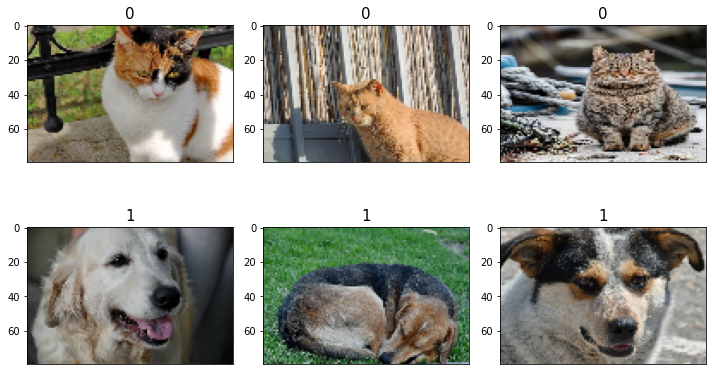

In [ ]:
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(ds_images_labels):
  ax = fig.add_subplot(2, 3, i+1)
  ax.set_xticks([])
  ax.set_xticks([])
  ax.imshow(example[0])
  ax.set_title('{}'.format(example[1].numpy()), size=15)
plt.tight_layout()
plt.show()

## tensorflow_datasets 라이브러리에서 데이터셋 로드

In [ ]:
!pip install --upgrade tensorflow-datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow_datasets as tfds
print(len(tfds.list_builders()))

1138


In [ ]:
print(tfds.list_builders()[:5])

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset']


* 데이터셋의 builder() 함수 호출
* download_and_prepare() 메서드 실행
* as_dataset() 메서드 호출

In [ ]:
mnist, mnist_info = tfds.load('mnist', with_info=True,
                              shuffle_files=False)

print(mnist_info)

print(mnist.keys())

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='/root/tensorflow_datasets/mnist/3.0.1.incomplete59W6B4',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
     

In [ ]:
ds_train = mnist['train']
ds_train = ds_train.map(lambda item: (item['image'], item['label']))

In [ ]:
ds_train = ds_train.batch(10)
batch = next(iter(ds_train))
print(batch[0].shape, batch[1])

(10, 28, 28, 1) tf.Tensor([4 1 0 7 8 1 2 7 1 6], shape=(10,), dtype=int64)


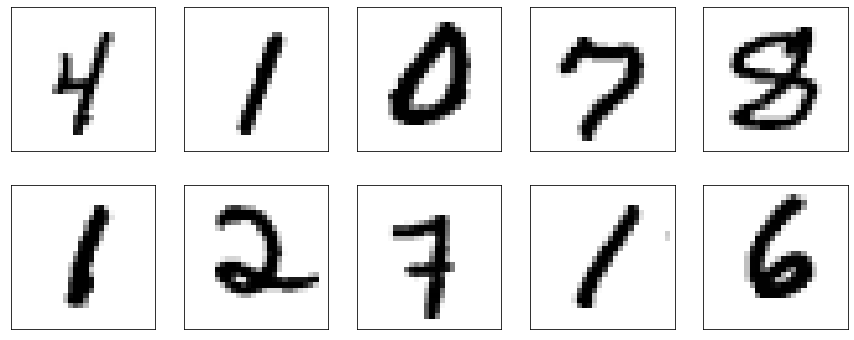

In [ ]:
fig = plt.figure(figsize=(15, 6))
for i, (image, label) in enumerate(zip(batch[0], batch[1])):
  ax = fig.add_subplot(2, 5, i+1)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.imshow(image[:,:,0], cmap='gray_r')
plt.show()

# 텐서플로 신경망 모델 만들기

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Text(0, 0.5, 'y')

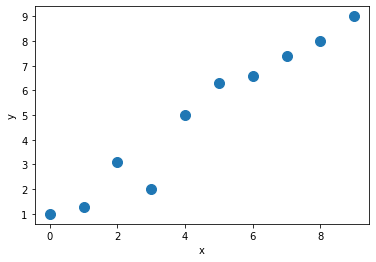

In [4]:
X_train = np.arange(10).reshape((10, 1))
y_train = np.array([1, 1.3, 3.1, 2, 5, 6.3, 6.6, 7.4, 8, 9])
plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')

In [5]:
X_train_norm = (X_train - np.mean(X_train))/np.std(X_train)

ds_train_orig = tf.data.Dataset.from_tensor_slices(
                    (tf.cast(X_train_norm, tf.float32), 
                     tf.cast(y_train, tf.float32)))

### 선형회귀모델

In [21]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.w = tf.Variable(0.0, name='weight')  # 파라미터(변수) 설정
    self.b = tf.Variable(0.0, name='bias')    # 파라미터(변수) 설정

  def call(self, x):
    return self.w * x + self.b

In [22]:
model = MyModel()
model.build(input_shape=(None, 1))
model.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


#### 확률적 경사 하강법

In [9]:
def loss_fn(y_true, y_pred):
  return tf.reduce_mean(tf.square(y_true - y_pred))

In [26]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as tape:
    current_loss = loss_fn(model(inputs), outputs)    # 손실함수
  dW, db = tape.gradient(current_loss, [model.w, model.b])    # 손실함수 미분값
  model.w.assign_sub(learning_rate * dW)   # W <- W - η*dW
  model.b.assign_sub(learning_rate * db)

In [10]:
tf.random.set_seed(1)

In [11]:
num_epochs = 200
log_steps = 100
learning_rate = 0.001
batch_size = 1
steps_per_epoch = int(np.ceil(len(y_train) / batch_size))

In [12]:
ds_train = ds_train_orig.shuffle(buffer_size=len(y_train))

In [13]:
ds_train = ds_train.repeat(count=None)

In [14]:
ds_train = ds_train.batch(1)

In [15]:
Ws, bs = [], []

In [27]:
for i, batch in enumerate(ds_train):
  if i >= steps_per_epoch * num_epochs:
    break
  Ws.append(model.w.numpy())
  bs.append(model.b.numpy())

  bx, by = batch
  loss_val = loss_fn(model(bx), by)

  train(model, bx, by, learning_rate=learning_rate)
  if i % log_steps == 0:
    print('에포크 {:3d}  스텝 {:4d}  손실 {:6.4f}'.format(int(i/steps_per_epoch), i, loss_val))

에포크   0  스텝    0  손실 4.0000
에포크  10  스텝  100  손실 0.7534
에포크  20  스텝  200  손실 20.2789
에포크  30  스텝  300  손실 8.8055
에포크  40  스텝  400  손실 6.3479
에포크  50  스텝  500  손실 7.6529
에포크  60  스텝  600  손실 0.2412
에포크  70  스텝  700  손실 4.8261
에포크  80  스텝  800  손실 1.9461
에포크  90  스텝  900  손실 0.1534
에포크 100  스텝 1000  손실 0.1370
에포크 110  스텝 1100  손실 0.7775
에포크 120  스텝 1200  손실 0.6281
에포크 130  스텝 1300  손실 0.1170
에포크 140  스텝 1400  손실 1.4107
에포크 150  스텝 1500  손실 0.1903
에포크 160  스텝 1600  손실 0.0903
에포크 170  스텝 1700  손실 0.3280
에포크 180  스텝 1800  손실 0.0743
에포크 190  스텝 1900  손실 2.1831


#### complie(), fit()


In [28]:
model = MyModel()

In [29]:
model.compile(optimizer='sgd',
              loss = loss_fn,
              metrics=['mae', 'mse'])

In [ ]:
model.fit(X_train_norm, y_train, epochs=num_epochs, batch_size=batch_size, verbose=1)

## 붓꽃 데이터셋 분류하는 다층 퍼셉트론

In [32]:
import tensorflow_datasets as tfds

In [33]:
iris, iris_info = tfds.load('iris', with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/150 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/iris/2.0.0.incompleteVI3EAL/iris-train.tfrecord*...:   0%|          | 0/15…

Dataset iris downloaded and prepared to /root/tensorflow_datasets/iris/2.0.0. Subsequent calls will reuse this data.


In [34]:
print(iris_info)

tfds.core.DatasetInfo(
    name='iris',
    full_name='iris/2.0.0',
    description="""
    This is perhaps the best known database to be found in the pattern recognition
    literature. Fisher's paper is a classic in the field and is referenced
    frequently to this day. (See Duda & Hart, for example.) The data set contains
    3 classes of 50 instances each, where each class refers to a type of iris
    plant. One class is linearly separable from the other 2; the latter are NOT
    linearly separable from each other.
    """,
    homepage='https://archive.ics.uci.edu/ml/datasets/iris',
    data_path=PosixGPath('/tmp/tmpxr83r24otfds'),
    file_format=tfrecord,
    download_size=4.44 KiB,
    dataset_size=7.62 KiB,
    features=FeaturesDict({
        'features': Tensor(shape=(4,), dtype=float32),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('features', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo nu

In [37]:
iris

{Split('train'): <PrefetchDataset element_spec={'features': TensorSpec(shape=(4,), dtype=tf.float32, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>}

In [35]:
tf.random.set_seed(1)

In [38]:
ds_orig = iris['train']

In [39]:
ds_orig = ds_orig.shuffle(150, reshuffle_each_iteration=False) # 훈련 테스트 데이터 따로 섞음

In [40]:
ds_train_orig = ds_orig.take(100) # 데이터를 두 부분으로 나눔
ds_test = ds_orig.skip(100)

In [41]:
ds_train_orig = ds_train_orig.map(lambda x: (x['features'], x['label']))  # 딕셔너리를 튜플로 변환
ds_test = ds_test.map(lambda x: (x['features'], x['label']))

In [43]:
iris_model = tf.keras.Sequential()

In [45]:
iris_model.add(tf.keras.layers.Dense(16, activation='sigmoid', name='fc1', input_shape=(4, )))

In [46]:
iris_model.add(tf.keras.layers.Dense(3, activation='softmax', name='fc2'))

In [47]:
iris_model.summary() # param = (n_in + 1) * n_out

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 16)                80        
                                                                 
 fc2 (Dense)                 (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [49]:
iris_model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [53]:
num_epochs=100
training_size=100
batch_size=2
steps_per_epoch=np.ceil(training_size/batch_size)

In [54]:
ds_train = ds_train_orig.shuffle(buffer_size=training_size)
ds_train = ds_train.repeat()
ds_train = ds_train.batch(batch_size=batch_size)
ds_train = ds_train.prefetch(buffer_size=1000)

In [55]:
history = iris_model.fit(ds_train, epochs=num_epochs,
                         steps_per_epoch=steps_per_epoch,
                         verbose=0)

In [58]:
hist = history.history

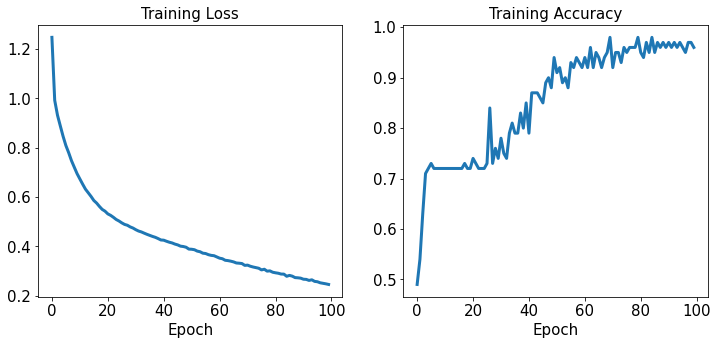

In [59]:
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.set_title('Training Loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.set_title('Training Accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

plt.show()

In [61]:
results = iris_model.evaluate(ds_test.batch(50), verbose=0)
print('테스트 손실 {:.4f}  테스트 정확도 {:.4f}'.format(*results))

테스트 손실 0.2625  테스트 정확도 0.9800


# 다층 신경망의 활성화 함수

In [62]:
import numpy as np

In [90]:
import matplotlib.pyplot as plt

In [72]:
X = np.array([1, 1.4, 2.5])
w = np.array([0.4, 0.3, 0.5])

## 로지스틱 함수
$ \phi_{logistic}(z) = \cfrac{1}{1+e^{-z}} $

In [73]:
def net_input(X, w):
  return np.dot(X, w)

def logistic(z):
  return 1/ (1 + np.exp(-z))

def logistic_activation(X, w):
   z = net_input(X, w)
   return logistic(z)

In [74]:
print('P(y=1|x) = %.3f' % logistic_activation(X, w))

P(y=1|x) = 0.888


In [78]:
A = np.array([[1, 0.1, 1.4, 2.5]])
w = np.array([[1.1, 0.4, 0.3, 0.5],
             [0.2, 0.4, 1, 0.2], 
             [0.6, 1.4, 1.2, 0.7]])

In [80]:
Z = np.dot(w, A[0])

y_probas = logistic(Z)
print('최종 입력: \n', y_probas)

최종 입력: 
 [0.94321382 0.89473061 0.98478288]


In [81]:
y_class = np.argmax(Z, axis=0)
print('최종 예측: \n', y_class)

최종 예측: 
 2


## 소프트맥스 함수
$ p(z) = \phi(z) = \cfrac{e^{z_i}}{\sum_{j=1}^{M}e^{z_j}}$

In [66]:
def softmax(z):
  return np.exp(z) / np.sum(np.exp(z))

In [83]:
y_probas = softmax(Z)

In [84]:
print('확률: \n', y_probas)

확률: 
 [0.1849146  0.09462239 0.72046302]


In [85]:
np.sum(y_probas)

1.0

#### Z를 배치 크기를 위한 차원 추가 후 활성화 적용

In [86]:
import tensorflow as tf

In [89]:
Z_tensor = tf.expand_dims(Z, axis=0)
tf.keras.activations.softmax(Z_tensor)

<tf.Tensor: shape=(1, 3), dtype=float64, numpy=array([[0.1849146 , 0.09462239, 0.72046302]])>

## 하이퍼볼릭 탄젠트 함수
2배 큰 출력 범위  
$ \phi_{tanh}(z) = 2 \times \phi_{logistic}(2z) - 1 = \cfrac{e^z - e^{-z}}{e^z+e^{-z}} $

In [91]:
def tanh(z):
  e_p = np.exp(z)
  e_n = np.exp(-z)
  return (e_p - e_n) / (e_p + e_n)

In [92]:
z = np.arange(-5, 5, 0.005)
log_act = logistic(z)
tanh_act = tanh(z)

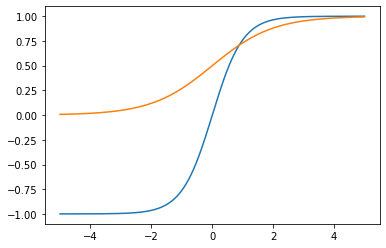

In [93]:
plt.plot(z, tanh_act, label='Tanh')
plt.plot(z, log_act, label='Logistic')

In [94]:
tf.keras.activations.tanh(z)

<tf.Tensor: shape=(2000,), dtype=float64, numpy=
array([-0.9999092 , -0.99990829, -0.99990737, ...,  0.99990644,
        0.99990737,  0.99990829])>

## 렐루 함수
$ \phi(z) = max(0, z) $

In [95]:
tf.keras.activations.relu(z)

<tf.Tensor: shape=(2000,), dtype=float64, numpy=array([0.   , 0.   , 0.   , ..., 4.985, 4.99 , 4.995])>